# **🎸Estudo Analítico do Consumo Musical no meio Digital - Data Science**

### **Objetivo do Projeto**

Analisar as tendências musicais dos provedores de musicas por meio de técnicas de Ciência e Análise de Dados. Identificando padrões nas caracteristicas das musicas, comportamento das musicas ao longo do tempo e fatores que influenciam ao sucesso das músicas. Desta forma, esse estudo visa gerar insights relevantes sobre o mercado musical e apoiar tomadas de decisão baseadas em dados.



---

## **1. Instalação das Bibliotecas**

Realização da ação de importação de determinadas bibliotecas da linguagem Python, trazendo diversos benefícios para o projeto. Dentre eles:

* Melhora na eficiência e na qualidade do código.
* Economizando tempo.
* Permitem alterações no código a realização de determinadas ações de forma modular.

Bibliotecas que foram instaladas:

* **Pandas:** Para manipulação e análise de dados tabulares.
* **Numpy:** Operações matemáticas e arrays multimensionais.
* **Matplotlib:** Importada para realizarmos visualizações e gráficos focado em dados.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Coleta de Dados**

Utilizamos um arquivo no formato CSV denominado como **`popular_spotify_songs`**, que nele contém os determinados aspectos:

* **Período Histórico da Base:** Dados de musicas de 1930 até 2023

* **Nível de Granularidade:** O nível de granularidade é Anual. Desta forma, permitindo análises detalhadas das tendências ao longo do tempo, variações sazonais e crescimento anual dos lançamentos musicais.



In [11]:
"""
Objetivo: O código abaixo realiza a captura e leitura de um arquivo CSV e um 
processo de validação verificando o nome das colunas para verificar se a importação 
foi bem sucedida.

1. Lê o arquivo CSV usando o método de pd.read_csv(), armazenando os dados coletados em um Data Frame do Python.

2. Usando a sintaxe de nome_arquivo.columns, conseguimos verificar os nomes das colunas fazendo um processe de validação.
    *  A exibição dos nomes das colunas permite verificar se o arquivo CSV foi importado corretamente e 
       se as colunas estão nomeadas como esperado
"""
#==========================================================================================================================

# Lendo o arquivo CSV (Popular_Spotify_Songs.csv)
Base_Musicas_Spotify = pd.read_csv(r'C:\Users\jmend\OneDrive\Documentos\Projetos\Spotify Analysis\Base de Dados\Popular_Spotify_Songs_2.csv', encoding='latin1', sep=';')

# Um processo de validação na qual exibo os nomes das colunas do Data Frame para verificar se a importação do conjunto de dados deu certo.
Base_Musicas_Spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'released_year_correct', 'released_month_correct'],
      dtype='object')

### **2.1 Organização do Conjunto de Dados**

* **Objetivo:**  Deixar o conjunto de dados mais estruturado e compreender quais são as principais features e como devemos utilizar elas no projeto.

* **Ações Realizadas:** 

    * Renomear nomes das colunas
    * Descrição de cada feature

###  **Colunas Renomeadas**

In [12]:
Colunas_Renomeadas = [
    'nome_musica', 'nome_artista', 'qtd_artistas', 'ano_lancamento',
    'mes_lancamento', 'dia_lancamento', 'playlists_spotify',
    'charts_spotify', 'reproducoes', 'playlists_apple', 'charts_apple',
    'playlists_deezer', 'charts_deezer', 'charts_shazam', 'bpm',
    'tom', 'modo', 'dançabilidade', 'valência', 'energia',
    'acusticidade', 'instrumentalidade', 'vivacidade', 'oralidade',
    'ano_corrigido', 'mes_corrigido'
]

Base_Musicas_Spotify.columns = Colunas_Renomeadas

Base_Musicas_Spotify.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_musica        947 non-null    object
 1   nome_artista       947 non-null    object
 2   qtd_artistas       947 non-null    object
 3   ano_lancamento     947 non-null    int64 
 4   mes_lancamento     947 non-null    int64 
 5   dia_lancamento     947 non-null    int64 
 6   playlists_spotify  947 non-null    int64 
 7   charts_spotify     947 non-null    int64 
 8   reproducoes        947 non-null    object
 9   playlists_apple    947 non-null    int64 
 10  charts_apple       947 non-null    int64 
 11  playlists_deezer   947 non-null    object
 12  charts_deezer      947 non-null    int64 
 13  charts_shazam      897 non-null    object
 14  bpm                947 non-null    int64 
 15  tom                854 non-null    object
 16  modo               946 non-null    object
 1

### **Descrição do Conjunto de Dados**

* **Quantidade de Features:** 22

* Abaixo, temos uma brece descrição do objetivo daquela coluna:


| Coluna                    | Descrição                                                                 |
|---------------------------|---------------------------------------------------------------------------|
| `track_name`              | Nome da música.                                                          |
| `artist(s)_name`          | Nome(s) do(s) artista(s) que interpretam a faixa.                        |
| `artist_count`            | Quantidade de artistas envolvidos na música.                             |
| `released_year`           | Ano original de lançamento da música.                                    |
| `released_month`          | Mês original de lançamento.                                              |
| `released_day`            | Dia do lançamento.                                                       |
| `released_year_correct`   | Ano de lançamento corrigido .                                            |
| `released_month_correct`  | Mês de lançamento corrigido.                                             |
| `in_spotify_playlists`    | Número de playlists do Spotify em que a música aparece.                  |
| `in_spotify_charts`       | Número de vezes que a música apareceu em rankings do Spotify.            |
| `streams`                 | Número total de reproduções no Spotify.                                  |
| `in_apple_playlists`      | Número de playlists da Apple Music com a música.                         |
| `in_apple_charts`         | Número de aparições em rankings da Apple Music.                          |
| `in_deezer_playlists`     | Número de playlists da Deezer com a música.                              |
| `in_deezer_charts`        | Número de aparições em rankings da Deezer.                               |
| `in_shazam_charts`        | Número de vezes que a música apareceu em rankings do Shazam.             |
| `bpm`                     | Batidas por minuto – ritmo da música.                                    |
| `key`                     | Tom musical da música.                                                   |
| `mode`                    | Modo musical: 0 = menor, 1 = maior.                                      |
| `danceability_%`          | Quão dançante é a música (0 a 100%).                                     |
| `valence_%`               | Grau de positividade/alegria da música (0 a 100%).                       |
| `energy_%`                | Energia da música (0 a 100%).                                            |
| `acousticness_%`          | Probabilidade da música ser acústica (0 a 100%).                         |
| `instrumentalness_%`      | Probabilidade de ser uma faixa instrumental (0 a 100%).                  |
| `liveness_%`              | Probabilidade de a faixa ter sido gravada ao vivo (0 a 100%).            |
| `speechiness_%`           | Presença de palavras faladas na faixa (0 a 100%).                        |



## **3. Validação da Base de Dados**

* **Objetivo**

Realização de determinadas validações para conseguirmos compreender como está a distribuição dos dados dentro da base. Certamente, essa etapa auxilia no entendimento de que técnicas de pré - processamentos podemos aplicar e por qual caminhao as nossas análises tendem a ir a partir dessas validações.

* **Ações Realizadas**

    * Conversão do Tipo de Dado

        * 
        
    * Identificação de valores nulos

        * Foi realizada uma validação inicial da base de dados, focando na verificação de valores nulos em cada coluna. Desta forma, foi identificado que a maioria das colunas não possui valores nulos e está pronta para análise. Porém, há 3 colunas que possuem dados faltantes:

        * `charts_shazam:` 50 valores nulos — pode indicar músicas que não apareceram no ranking do Shazam.
        * `tom:` 93 valores nulos — pode indicar ausência de informação sobre o tom musical.
        * `modo:`1 valor nulo — fácil de corrigir com valor mais comum (ex: modo maior).

    * Identificação de valores duplicados

        * Não há presença de valores duplicados. Desta forma não será necessário realizar a remoção/trativas desses valores.
        

    * Identificar Outliers em cada feature

        * Uma análise de outliers utilizando boxplot para cada variável numéricas da nossa base de dados. Desta forma, foi identificado que:

        * A maioria das variáveis apresenta uma distribuição concentrada sem grandes variações.
        * No entanto, colunas como playlists_apple demonstraram a presença de outliers extremos, indicando músicas com números de inclusão em playlists muito acima da média.
        * Esses valores fora da curva podem representar grandes sucessos ou casos atípicos que merecem atenção na análise.

### **3.1 Identificação de Valores Nulos**

In [16]:
"""
Objetivo: Identificar a quantidade de valores nulos presentes em todas as features

Neste sentido, tudo aquilo que for considerado como nulo (isnull) ele vai somar 
quantas vezes aparece e demonstrar esse valor encontrado.

"""
#==========================================================================================================================

# Realizando a soma dos valores nulos presentes na base.
Base_Musicas_Spotify.isnull().sum()

nome_musica           0
nome_artista          0
qtd_artistas         18
ano_lancamento        0
mes_lancamento        0
dia_lancamento        0
playlists_spotify     0
charts_spotify        0
reproducoes           1
playlists_apple       0
charts_apple          0
playlists_deezer     79
charts_deezer         0
charts_shazam        57
bpm                   0
tom                  93
modo                  1
dançabilidade        18
valência              0
energia               0
acusticidade          0
instrumentalidade     0
vivacidade            0
oralidade             0
ano_corrigido         0
mes_corrigido         0
dtype: int64

### **3.2 Identificação de Valores Duplicados**

In [17]:
"""
Objetivo: Identificar a quantidade de valores duplicados presentes em toda a base.

Certamente, valores duplicados são aqueles que aparecem +1 vez na base de dados, 
seguindo a mesma lógica da validação anterior ele vai somar quantas vezes valores 
duplicados aparecem e demonstrar o resultado encontrado.

"""
#==========================================================================================================================

# Realizando a soma dos valores duplicados presentes na base. 
Base_Musicas_Spotify.duplicated().sum()

0

### **3.3 Identificar a presença de outliers nas features**

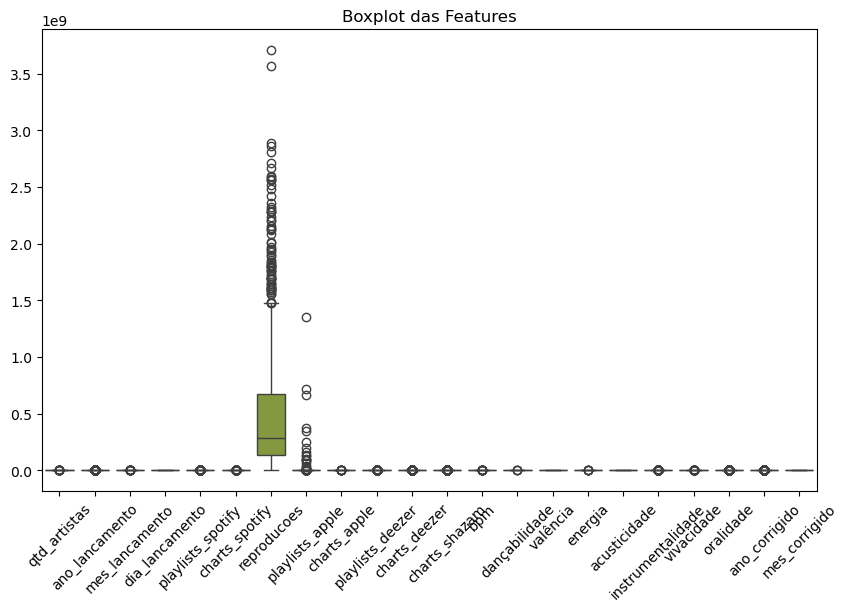

In [18]:
"""
Objetivo: Criar box plots para podermos visualizar a distribuição dos dados nas colunas numéricas da base.

1. Configura a largura e altura da figura para o gráfico usando plt.figure(figsize=())

2. Cria os box plots para todas as colunas que são numéricas usando sns.boxplot()

3. Para melhor legibilidade coloca o eixo x em 45 graus usando xticks(rotation=45)

4. Adiciona um título ao gráfico usando plt.titl

5. Exibe o gráfico

Box Plots são úteis para identificarmos a distribuição e a presença de outliers nos dados em cada coluna.
"""
#==========================================================================================================================

# Configurar tamanho da figura
plt.figure(figsize=(10, 6))

# Criar box plots para todas as colunas numéricas
sns.boxplot(data=Base_Musicas_Spotify)

# Exibir gráfico
plt.xticks(rotation=45)
plt.title("Boxplot das Features")
plt.show()

## **4. Processamento**

* **Objetivo**

As técnicas de pré processamento são extremamentes importantes para que posso realizar a tratativa da base deixando ela mais limpa e eficiente para as futura análises. Como identificado na etapa anterior denominada como `validação` encontramos algumas colunas com dados nulos. Desta forma, o intuito aqui na etapa de `processamento` é gerarmos ações que possamos realizar a tratativa desses valores removendo os nulos e inserindo preenchimentos de informação.

* **Matriz com informações das colunas com valores nulos**

| Coluna                    | Quantidade de Nulos | Interpretação |Ação           |
|---------------------------|---------------------|---------------|---------------|
| `charts_shazam`           | 50                  |Ausência de aparição em rankings do Shazam                | Preencher com 0 (assumindo "não apareceu")              |
| `tom`          | 93                     |Dados ausentes sobre o tom musical da faixa               |Avaliar preenchimento com moda ou descartar               |
| `modo`            | 1                         |Dado faltante sobre o modo (maior/menor)                  |Preencher com moda ou linha pode ser mantida  |

* **Ações Realizadas**

    * Conversão do tipo de dado das colunas de Object para Numeric

        * Este tipo de conversão vai permitir que possamos realizar gráficos eficientes para encontrar correlações entre as features como o gráfico de mapa de calor. Desta forma, podemos encontrar melhor os padrões e ter visualizações mais diretas e eficientes.

    * Tratamento de Dados Missing:
    
        * Nas colunas `charts_shazam` e `tom` realizei a tratativa de maneira diferentes mas que seguem o mesmo principio que seria imputar respectivos nas linhas com dados faltantes. Certamente, na coluna que tinha a segunda maior aparição de dados nulos (50) eles foram preenchidos com o valor 0, já que foi interpretado que a ausência de valor se deve pelo fato da musica não estar no rankings da plataforma. E na coluna denominada como `tom` utilizei o método estatistico moda já que eram muitos valores nulos e tinha muita a aparição de determinados tons.


### **4.1 Conversão do Tipo de Dados**

In [13]:
Base_Musicas_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_musica        947 non-null    object
 1   nome_artista       947 non-null    object
 2   qtd_artistas       947 non-null    object
 3   ano_lancamento     947 non-null    int64 
 4   mes_lancamento     947 non-null    int64 
 5   dia_lancamento     947 non-null    int64 
 6   playlists_spotify  947 non-null    int64 
 7   charts_spotify     947 non-null    int64 
 8   reproducoes        947 non-null    object
 9   playlists_apple    947 non-null    int64 
 10  charts_apple       947 non-null    int64 
 11  playlists_deezer   947 non-null    object
 12  charts_deezer      947 non-null    int64 
 13  charts_shazam      897 non-null    object
 14  bpm                947 non-null    int64 
 15  tom                854 non-null    object
 16  modo               946 non-null    object
 1

In [14]:
# Converter colunas numéricas mal interpretadas como object
Base_Musicas_Spotify['qtd_artistas'] = pd.to_numeric(Base_Musicas_Spotify['qtd_artistas'], errors='coerce')
Base_Musicas_Spotify['reproducoes'] = pd.to_numeric(Base_Musicas_Spotify['reproducoes'], errors='coerce')
Base_Musicas_Spotify['playlists_deezer'] = pd.to_numeric(Base_Musicas_Spotify['playlists_deezer'], errors='coerce')
Base_Musicas_Spotify['charts_shazam'] = pd.to_numeric(Base_Musicas_Spotify['charts_shazam'], errors='coerce')
Base_Musicas_Spotify['dançabilidade'] = pd.to_numeric(Base_Musicas_Spotify['dançabilidade'], errors='coerce')


In [15]:
Base_Musicas_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nome_musica        947 non-null    object 
 1   nome_artista       947 non-null    object 
 2   qtd_artistas       929 non-null    float64
 3   ano_lancamento     947 non-null    int64  
 4   mes_lancamento     947 non-null    int64  
 5   dia_lancamento     947 non-null    int64  
 6   playlists_spotify  947 non-null    int64  
 7   charts_spotify     947 non-null    int64  
 8   reproducoes        946 non-null    float64
 9   playlists_apple    947 non-null    int64  
 10  charts_apple       947 non-null    int64  
 11  playlists_deezer   868 non-null    float64
 12  charts_deezer      947 non-null    int64  
 13  charts_shazam      890 non-null    float64
 14  bpm                947 non-null    int64  
 15  tom                854 non-null    object 
 16  modo               946 non

### **4.2 Tratamento de Dados Missing**

In [19]:
Base_Musicas_Spotify.loc[Base_Musicas_Spotify['charts_shazam'].isnull(), 'charts_shazam'] = 0

moda = Base_Musicas_Spotify['tom'].mode()[0]
Base_Musicas_Spotify.loc[Base_Musicas_Spotify['tom'].isnull(), 'tom'] = moda

Base_Musicas_Spotify.isnull().sum()



nome_musica           0
nome_artista          0
qtd_artistas         18
ano_lancamento        0
mes_lancamento        0
dia_lancamento        0
playlists_spotify     0
charts_spotify        0
reproducoes           1
playlists_apple       0
charts_apple          0
playlists_deezer     79
charts_deezer         0
charts_shazam         0
bpm                   0
tom                   0
modo                  1
dançabilidade        18
valência              0
energia               0
acusticidade          0
instrumentalidade     0
vivacidade            0
oralidade             0
ano_corrigido         0
mes_corrigido         0
dtype: int64

## **5. Análises**

### **5.1 Análise Univariada**

**Objetivo**

A análise univariada tem como objetivo entender o comportamento individual de cada variável da base de dados. Desta forma, utilizando histogramas e valores estatisticos vamos analisar as variaveis de `reproducoes`, `bpm`, `energia`, `valência`, `playlists_spotify`, `playlists_apple`, `playlists_dezzer`. Certamente, com o intuito de verificar as distribuições dos dados, valores extremos e concentrados.


**📊 Resultados da Análise**

* **Características Musicais (Reproducoes, bpm, energia, valência)**

    * Distribuição de `reproducoes`
    
        A maioria das músicas tem poucas reproduções. Desta forma, um número muito pequeno de músicas possui um número elevado de reproduções. Certamente, isso indica uma baixa taxa de engajamento geral com a maioria das músicas neste conjunto de dados, com o sucesso encontrado em poucas faixas.

    * Distribuição de `bpm`

        A maioria das músicas tem um tempo moderado, concentrado em torno de 120 bpm. Desta forma, sugere uma preferência por músicas com um ritmo dentro de uma faixa considerada "padrão".

    * Distribuição de `energia`

        Neste conjunto de dados a maioria das músicas é considerada "energética" já que a valores altos próximos a 100. Isso indica que nessa base há predominância de músicas com intensidades elevadas.

    * Distribuição de `valência`

        A positividade das músicas possui uma variação bem acentuada e com isso não tem um pico central forte. Isto sugere uma diversidade de sentimentos expressos nas músicas, sem uma clara inclinação para alegria ou tristeza.

* **Popularidade em Plataformas de Reprodução (playlists_spotify, playlists_apple, playlists_deezer)**

    * Distribuição de `playlists_spotify`

        Apenas um número muito pequeno de músicas está presente em muitas playlists. Desta forma, a popularidade na plataforma do spotify é altamente concentrada em um pequeno grupo de músicas.

    * Distribuição de `playlists_apple`

        Raríssimas músicas alcançam uma presença significativa em playlists da Apple Music. A popularidade parecem ser ainda mais restritas a um grupo seleto de músicas.

    * Distribuição de `playlists_deezer`

        A dinâmica de popularidade em playlists no Deezer também favorece um pequeno conjunto de músicas, mas pode haver uma distribuição um pouco mais equilibrada em comparação com Spotify e Apple Music.

* **Em resumo**

    * **Características Musicais:** O conjunto de dados parece tender para músicas energéticas com um tempo moderado, mas com uma variedade de sentimentos e um baixo engajamento geral em termos de reproduções (a maioria das músicas não é muito ouvida).

    * **Popularidade em Streaming:** A popularidade em playlists nas três principais plataformas de streaming é altamente concentrada. A grande maioria das músicas tem baixa visibilidade em playlists, enquanto apenas uma pequena parcela alcança uma ampla inclusão. A concentração parece ser mais extrema no Apple Music.

        



In [20]:
Base_Musicas_Spotify[['reproducoes', 'bpm', 'energia', 'valência', 'playlists_spotify', 'playlists_apple', 'playlists_apple', 'playlists_deezer']].describe()

,reproducoes,bpm,energia,valência,playlists_spotify,playlists_apple,playlists_apple,playlists_deezer
count,9.460000e+02,947.000000,947.000000,947.000000,947.000000,9.470000e+02,9.470000e+02,868.000000
mean,5.109650e+08,120.722281,64.004224,51.794087,5189.233369,5.135283e+06,5.135283e+06,109.966590
std,5.696151e+08,31.395452,16.792792,23.533990,7930.019094,5.857747e+07,5.857747e+07,179.269812
min,0.000000e+00,0.000000,9.000000,4.000000,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.393158e+08,98.000000,53.000000,33.000000,848.000000,1.400000e+01,1.400000e+01,12.000000
50%,2.872399e+08,120.000000,66.000000,52.000000,2175.000000,3.700000e+01,3.700000e+01,37.500000
75%,6.735149e+08,140.000000,77.000000,70.500000,5516.500000,9.400000e+01,9.400000e+01,110.000000
max,3.703895e+09,206.000000,97.000000,97.000000,52898.000000,1.356565e+09,1.356565e+09,974.000000


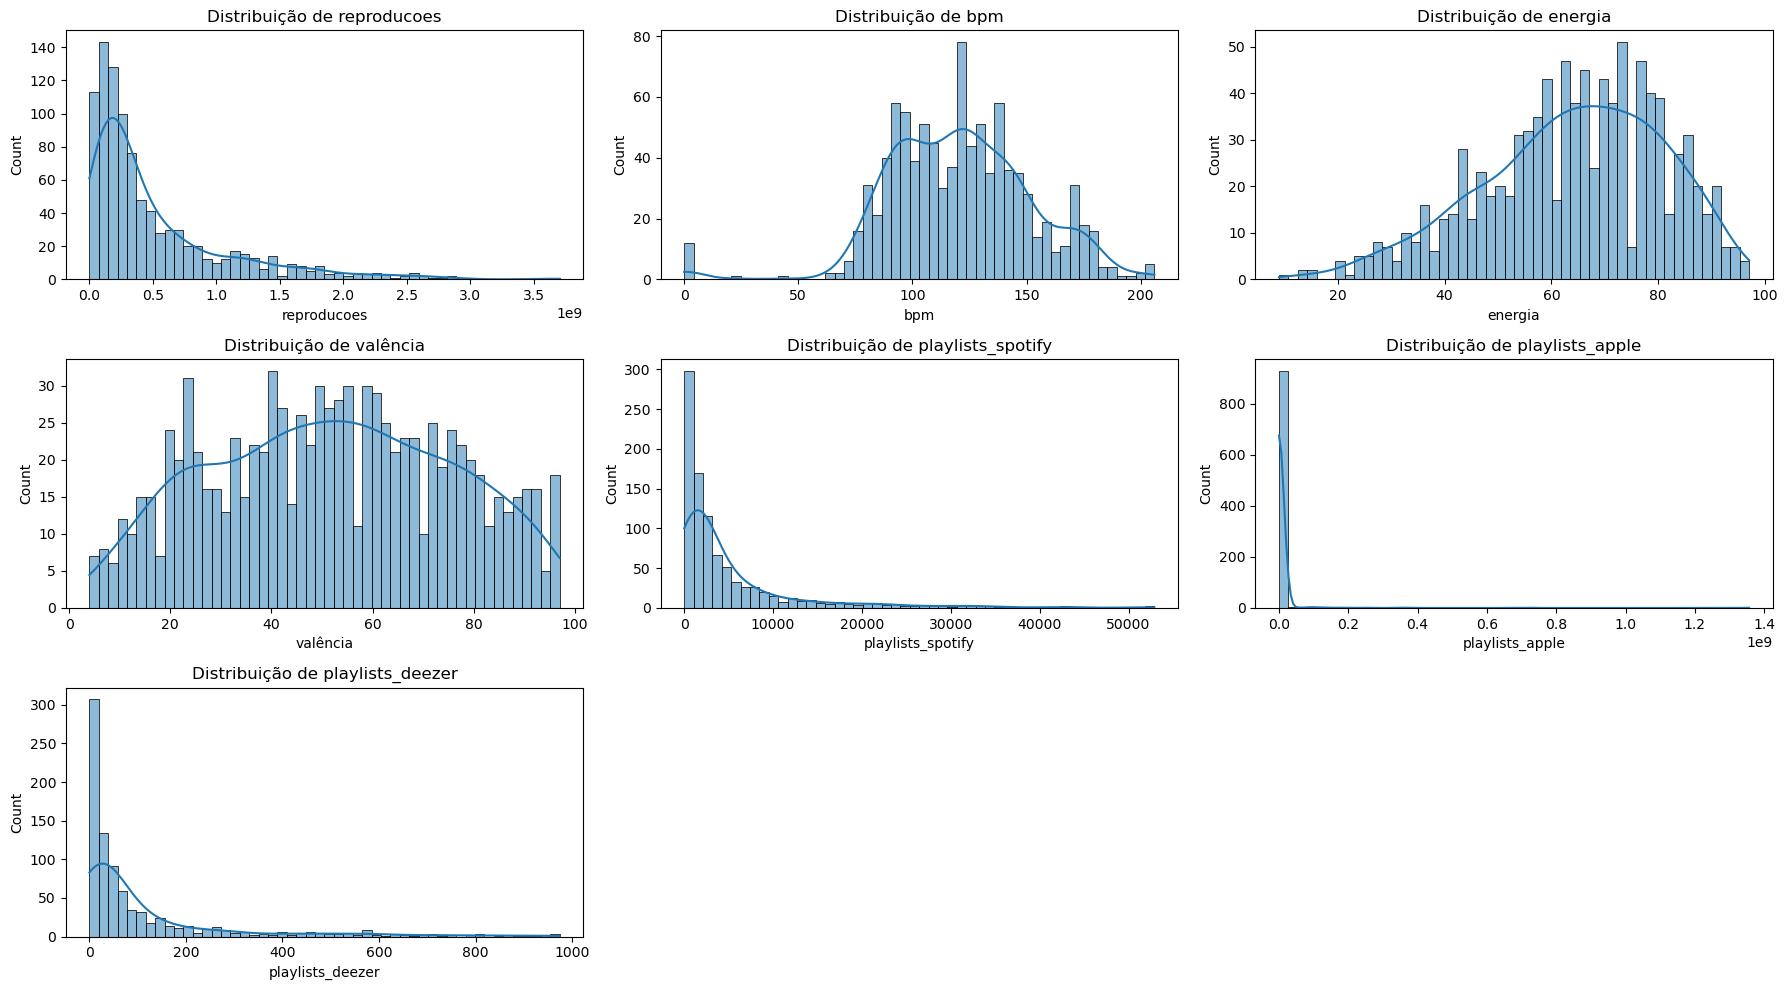

In [21]:
variaveis = ['reproducoes', 'bpm', 'energia', 'valência', 'playlists_spotify', 'playlists_apple', 'playlists_deezer']

plt.figure(figsize=(18, 10))

for i, var in enumerate(variaveis, 1):
    plt.subplot(3, 3, i)
    sns.histplot(Base_Musicas_Spotify[var], bins=50, kde=True)
    plt.title(f"Distribuição de {var}")

plt.tight_layout()
plt.show()

### **5.2 Análises Multivariadas**

**Objetivo**

A análise multivariada visa identificar relações entre diferentes variáveis da base de dados, ajudando a entender padrões e possíveis dependências. Para isso, utilizamos a matriz de correlação e gráficos de dispersão para medirmos o grau de associação entre as variáveis numéricas.

**Resultados da Análise**

* **playlists_spotify e playlists_apple (0.83):**

    * Forte correlação positiva, indicando que músicas populares no spotify tendem a ser populares em playlists da Apple Music também.

* **dancabilidade e energia (0.41):**

    * Correlação positiva, sugerindo que músicas com maior energia tendem a ser mais dançáveis.

* **energia e sonoridade (loudness) (0.58)**

    * Correlação positiva moderada, indicando que músicas mais energéticas tendem a ser mais "altas".

* **dancabilidade e energia (0.41):** 
    
    * Correlação positiva moderada, sugerindo que músicas com maior energia tendem a ser mais dançáveis.

* **Reproducoes vs Energia**

    * A ausência de uma forte correlação sugere que a energia de uma música. por si só, não é um fator determinante para o seu sucesso em termos de número de reproduções. Certamente, músicas calmas e enérgicas podem ambas ter poucos ou muitos plays.

* **Média de Visibilidade nas Plataformas Digitais**

    * Há uma disparidade notável na média de visibilidade entre as plataformas. A Apple Music aparente oferecer, em média, uma exposição muito maior para as músicas em seus ecossistemas de playlists e charts. Desta forma, isso sugere que nessa plataforma há uma maior probabilidade das musicas dos artistas e gravadores de serem descobertas através de playlists e charts. 

**Principais Insights**

* A forte correlação positiva entre os diferentes serviços de reproduções de musicas sugere que a popularidade de uma música tende a ser consistente entre esses serviços.

* As características musicais apresentam correlações esperadas e intuitivas. Desta forma, isso sugere que alguns padrões e associações tendem a ocorrer juntos e beneficiam diferentes atributos do som e a estrutura das músicas.

* As fracas correlações negativas entre o ano de lançamento e algumas características musicais sugerem tendências evolutivas sutis na produção musical ao longo do tempo. 





In [22]:
Base_Musicas_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nome_musica        947 non-null    object 
 1   nome_artista       947 non-null    object 
 2   qtd_artistas       929 non-null    float64
 3   ano_lancamento     947 non-null    int64  
 4   mes_lancamento     947 non-null    int64  
 5   dia_lancamento     947 non-null    int64  
 6   playlists_spotify  947 non-null    int64  
 7   charts_spotify     947 non-null    int64  
 8   reproducoes        946 non-null    float64
 9   playlists_apple    947 non-null    int64  
 10  charts_apple       947 non-null    int64  
 11  playlists_deezer   868 non-null    float64
 12  charts_deezer      947 non-null    int64  
 13  charts_shazam      947 non-null    float64
 14  bpm                947 non-null    int64  
 15  tom                947 non-null    object 
 16  modo               946 non

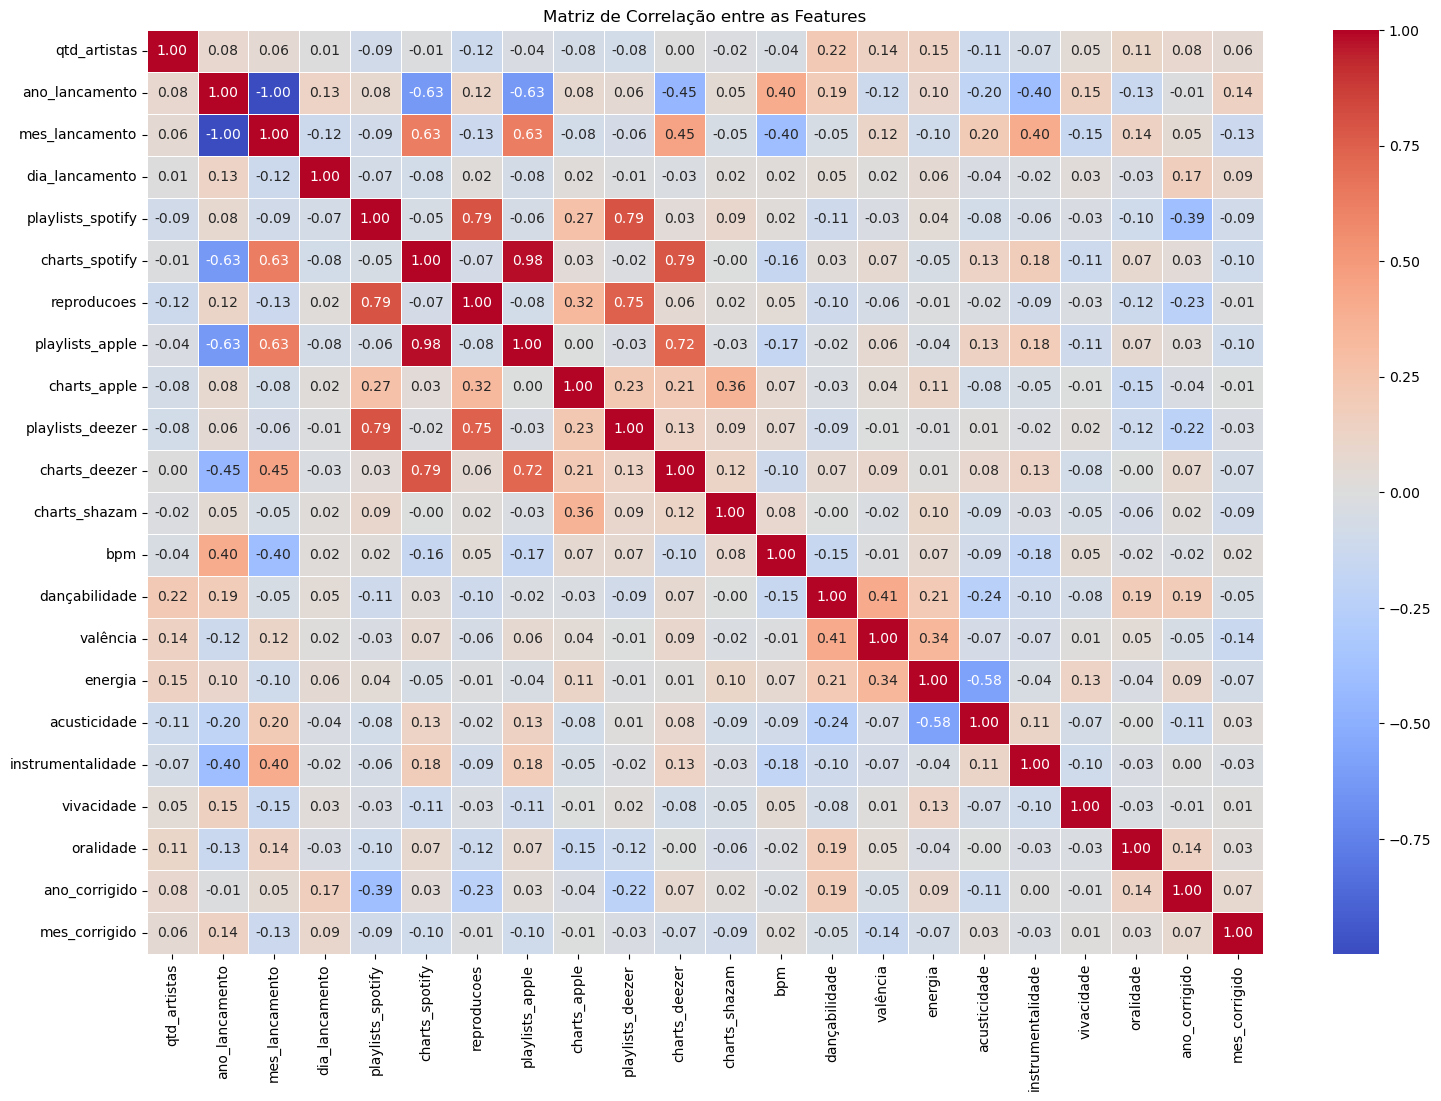

In [23]:
# Seleciona só as colunas numéricas
df_numerico = Base_Musicas_Spotify.select_dtypes(include='number')

# Heatmap com essas colunas
plt.figure(figsize=(18, 12))
sns.heatmap(df_numerico.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre as Features")
plt.show()


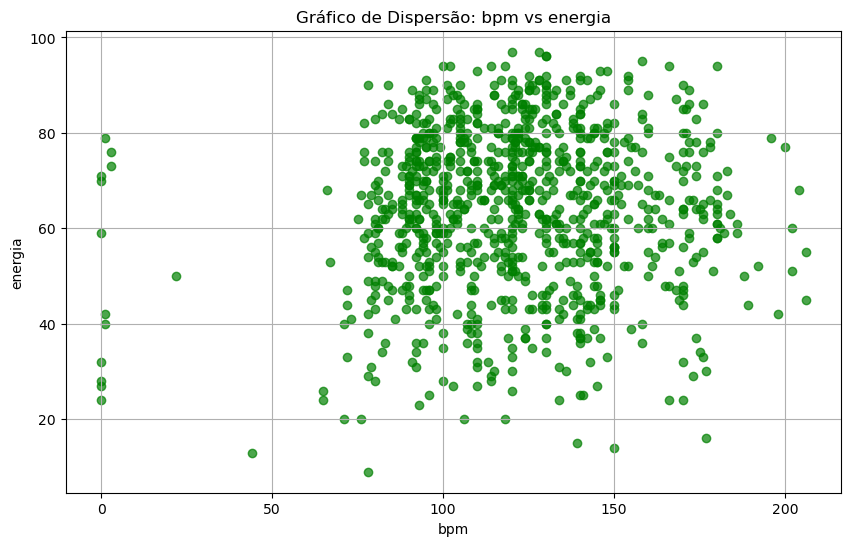

In [26]:
x_column = 'bpm'
y_column = 'energia'

plt.figure(figsize=(10, 6))
plt.scatter(Base_Musicas_Spotify[x_column], Base_Musicas_Spotify[y_column], color='green', alpha=0.7)
plt.title(f'Gráfico de Dispersão: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

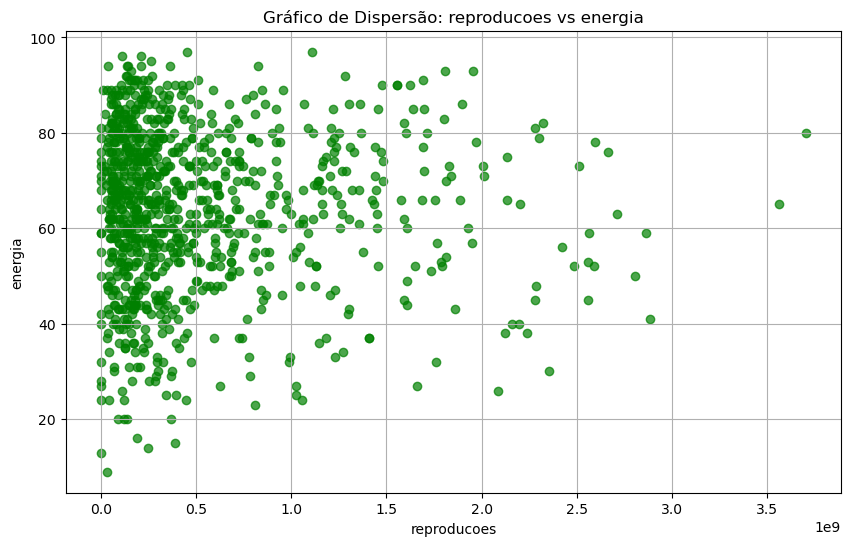

In [27]:
x_column = 'reproducoes'
y_column = 'energia'

plt.figure(figsize=(10, 6))
plt.scatter(Base_Musicas_Spotify[x_column], Base_Musicas_Spotify[y_column], color='green', alpha=0.7)
plt.title(f'Gráfico de Dispersão: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

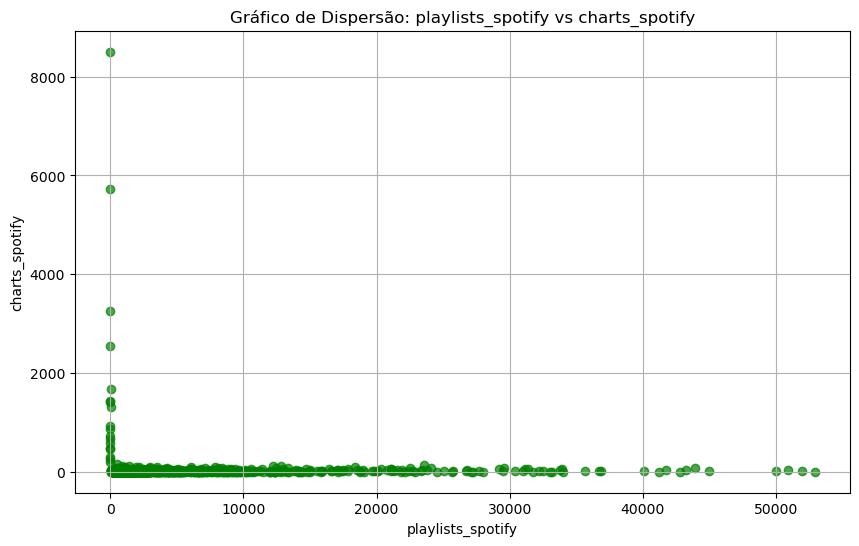

In [28]:
x_column = 'playlists_spotify'
y_column = 'charts_spotify'

plt.figure(figsize=(10, 6))
plt.scatter(Base_Musicas_Spotify[x_column], Base_Musicas_Spotify[y_column], color='green', alpha=0.7)
plt.title(f'Gráfico de Dispersão: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

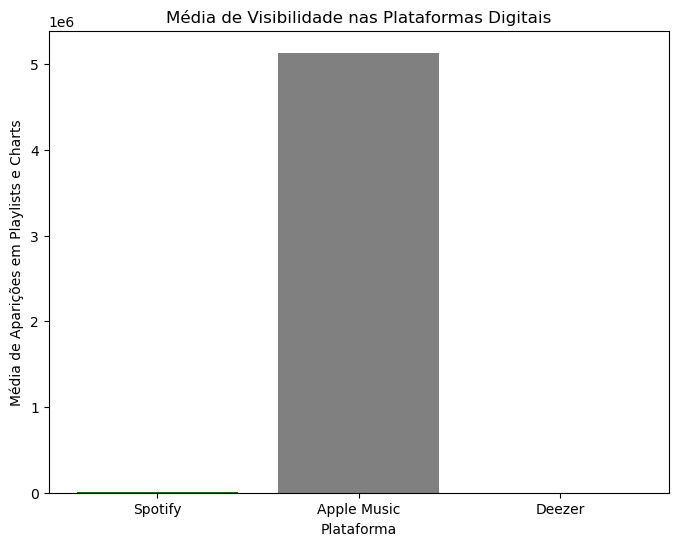

In [29]:

# Média de visibilidade por plataforma
media_visibilidade = {
    "Spotify": Base_Musicas_Spotify[["playlists_spotify", "charts_spotify"]].mean().sum(),
    "Apple Music": Base_Musicas_Spotify[["playlists_apple", "charts_apple"]].mean().sum(),
    "Deezer": Base_Musicas_Spotify[["playlists_deezer", "charts_deezer"]].mean().sum()
}

plt.figure(figsize=(8, 6))
plt.bar(media_visibilidade.keys(), media_visibilidade.values(), color=['green', 'gray', 'purple'])
plt.title("Média de Visibilidade nas Plataformas Digitais")
plt.ylabel("Média de Aparições em Playlists e Charts")
plt.xlabel("Plataforma")
plt.show()


## **Conclusão**

Com base na análise das diversas visualizações e métricas apresentadas, podemos traçar uma conclusão abrangente sobre este projeto:

* **Perfil Geral do Conjunto de Dados:**

    * O conjunto de dados analisado parece conter uma vasta gama de músicas, com a maioria apresentando um baixo engajamento em termos de reproduções. A popularidade, medida por reproduções, é altamente concentrada em uma pequena parcela das faixas.

    * Ao longo do tempo, observam-se tendências sutis em direção a músicas mais dançáveis e energéticas, e menos acústicas.

* **Desempenho e Visibilidade nas Plataformas de Streaming:**

    * O Apple Music se destaca por apresentar uma média de visibilidade significativamente maior em playlists e charts em comparação com Spotify e Deezer. Neste sentido, Spotify e Deezer mostram médias de visibilidade baixas e comparáveis.


* **Insigths**

    * A maior média de visibilidade no Apple Music pode indicar uma oportunidade maior de descoberta para artistas e músicas nessa plataforma, embora a razão por trás dessa disparidade mereça investigação.

    * A ausência de uma forte correlação entre energia e reproduções sugere que outros fatores (gênero, artista, marketing, etc.) desempenham um papel mais crucial no sucesso de uma música em termos de plays.

Em suma, este projeto de revela um cenário típico da indústria da musica, com uma batalha pela visibilidade, reproduções e engajamento. Desta forma, uma compreensão aprofundada das dinâmicas de um desses provedores de musicas se torna essencial para entendermos os fatores que impulsionam a popularidade para o sucesso neste ambiente competitivo.



